<a href="https://colab.research.google.com/github/labasubagia22/rockpaperscissors/blob/master/rockpaperscissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Download dataset from dicoding
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-05-16 12:07:14--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.02MB/s    in 53s     

2020-05-16 12:08:08 (5.80 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import os
import zipfile

# Extract dataset
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
import shutil
import os

# Directory
base_dir = '/tmp/rockpaperscissors'

# Class labels 
label = ['paper', 'rock', 'scissors']

# Remove unecessary item
# Cause it can add more label if not remove
for item in os.listdir(base_dir):

  # Skip image folder (label)
  if item in label:
    continue

  path = f'{base_dir}/{item}'
  # Folder 
  if os.path.isdir(path):
    shutil.rmtree(path)
  # File
  else:
    os.remove(path)

# show directory
os.listdir(base_dir)

['paper', 'scissors', 'rock']

In [ ]:
# Set img size
img_width = 150
img_length = 150

# Split dataset to training and validation
datagen = ImageDataGenerator(
    validation_split=.2,
    rescale=1./255,
    horizontal_flip=True,
    fill_mode='nearest',
) 

# Training dataset
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_length),
    batch_size=16,
    subset='training',
    class_mode='categorical',
)

# Validation dataset
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_length),
    batch_size=16,
    subset='validation',
    class_mode='categorical',
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Make CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_length, 3)),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile object model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
# Train model with dataset
model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=1,
)

Epoch 1/20
25/25 [==============================] - 12s 474ms/step - loss: 1.1054 - accuracy: 0.4200 - val_loss: 1.0420 - val_accuracy: 0.5000
Epoch 2/20
25/25 [==============================] - 12s 468ms/step - loss: 0.8197 - accuracy: 0.6675 - val_loss: 0.6162 - val_accuracy: 0.8125
Epoch 3/20
25/25 [==============================] - 12s 471ms/step - loss: 0.4468 - accuracy: 0.8500 - val_loss: 0.3591 - val_accuracy: 0.8125
Epoch 4/20
25/25 [==============================] - 12s 469ms/step - loss: 0.3352 - accuracy: 0.8900 - val_loss: 0.2392 - val_accuracy: 0.9375
Epoch 5/20
25/25 [==============================] - 11s 456ms/step - loss: 0.2990 - accuracy: 0.8951 - val_loss: 0.4473 - val_accuracy: 0.7536
Epoch 6/20
25/25 [==============================] - 12s 466ms/step - loss: 0.2547 - accuracy: 0.9000 - val_loss: 0.0782 - val_accuracy: 0.9750
Epoch 7/20
25/25 [==============================] - 12s 469ms/step - loss: 0.1107 - accuracy: 0.9575 - val_loss: 0.2597 - val_accuracy: 0.8875

In [ ]:
# Model evaluation
model.evaluate_generator(generator=validation_generator, steps=50, verbose=1) 

50/50 [==============================] - 7s 145ms/step - loss: 0.0983 - accuracy: 0.9602


[0.09831809252500534, 0.9601542353630066]

Saving 7A1YTmfZsbSdxPKy.png to 7A1YTmfZsbSdxPKy.png
7A1YTmfZsbSdxPKy.png
scissors


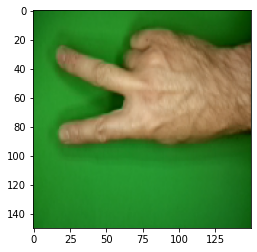

In [ ]:
# Upload file
# And predict it

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

uploaded = files.upload()

for item in uploaded.keys():

  # Resize image
  path = item
  img = image.load_img(path, target_size=(img_width, img_length))
  
  # Show image 
  plt.imshow(img)
  
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  # Predict
  images = np.vstack([x])
  classes = np.argmax(model.predict(images, batch_size=10))

  # Result
  print(item)
  print(label[classes])

  os.remove(item)